***Deep Learning Final Project Report***


**Dalton Lee**


**Project Goal** The aim of this project is to create a system that will take a quarterbacks career stats by year as an input, and give an output that predicts his stats for the upcoming season. The new generated statline can be run through a binary classifier that determines if that players output is worthy of an MVP performance or not that year.

**Models Used:** Random Forest, Linear Regression

First we can train the binary classifier on the provided data set, with the following structure 

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the CSV into a pandas DataFrame
df = pd.read_csv('quarterback_stats.csv')

# Split the QBrec column into wins, losses, and ties
df[['Wins', 'Losses', 'Ties']] = df['QBrec'].str.split('-', expand=True)

# Convert the wins, losses, and ties columns to numeric data types
df[['Wins', 'Losses', 'Ties']] = df[['Wins', 'Losses', 'Ties']].apply(pd.to_numeric)

# Drop the original QBrec column and the MVP column
X = df.drop(['QBrec', 'MVP'], axis=1)
y = df['MVP']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(df)

      G   QBrec   Yds  TD  Int   Rate  MVP  Wins  Losses  Ties
0    16  14-2-0  4002  27   12   95.0    1    14       2     0
1    16  14-2-0  4500  33   16   99.9    1    14       2     0
2    16  14-2-0  3900  36    4  111.0    1    14       2     0
3    16  14-1-0  4642  45    6  122.5    1    14       1     0
4    16  13-3-0  5477  55   10  115.1    1    13       3     0
..   ..     ...   ...  ..  ...    ...  ...   ...     ...   ...
113   4   1-3-0  1042   6    5   82.6    0     1       3     0
114   5   4-1-0  1020   7    3   89.7    0     4       1     0
115   5   0-5-0   984   4    6   64.0    0     0       5     0
116   4   0-4-0   736   3    2   84.6    0     0       4     0
117  16  12-4-0  5097  50   12  113.8    1    12       4     0

[118 rows x 10 columns]


Then we can train that with the sklearn packaged RandomForest Classifier, and test it with Accuracy, precision, and F1 score metrics

In [21]:
# Train a binary classifier on the training data
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluate the performance of the classifier on the test data
y_pred = clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred))

Accuracy: 0.9583333333333334
Precision: 1.0
F1-score: 0.8571428571428571


Now our classifier can be tested with the input of a new stat line, and an output of 0 or 1 will let us know if that statline is MVP worth. Here we are using a stat line of a quarterback that definitely should win the MVP

In [22]:
# Define the new stat line with the 'Wins', 'Losses', and 'Ties' columns included
new_stat_line = [[16, '13-3-0', 4299, 48, 5, 121.5]]
new_stat_line_df = pd.DataFrame(new_stat_line, columns=['G', 'QBrec', 'Yds', 'TD', 'Int', 'Rate'])

# Split the QBrec column into wins, losses, and ties
new_stat_line_df[['Wins', 'Losses', 'Ties']] = new_stat_line_df['QBrec'].str.split('-', expand=True)

# Convert the wins, losses, and ties columns to numeric data types
new_stat_line_df[['Wins', 'Losses', 'Ties']] = new_stat_line_df[['Wins', 'Losses', 'Ties']].apply(pd.to_numeric)

# Drop the QBrec column and make the prediction
new_stat_line_df = new_stat_line_df.drop('QBrec', axis=1)
new_prediction = clf.predict(new_stat_line_df)
print('New prediction:', new_prediction)


New prediction: [1]


It predicts 1, so the classifier seems to be working. We can also plot from the dataset to see how the classes are distributed, here we will make the plot only wiht passing yards and touchdowns

/var/folders/gf/nqsfvxhx4mx014vns90_194r0000gn/T/ipykernel_36238/2471594579.py:24: UserWarning: No contour levels were found within the data range.
  plt.contour(xx, yy, Z, colors='k', levels=[0], alpha=0.5)


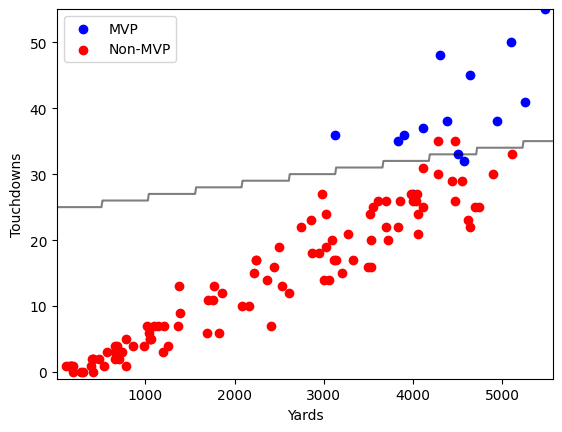

In [9]:
# Read in the CSV file
data = pd.read_csv('quarterback_stats.csv')

# Separate the data into MVP and non-MVP groups based on the binary classification column
mvp_data = data[data['MVP'] == 1]
non_mvp_data = data[data['MVP'] == 0]

# Create a scatter plot with yards on the x-axis, touchdowns on the y-axis, and different colored markers for the two groups
plt.scatter(mvp_data['Yds'], mvp_data['TD'], color='blue', label='MVP')
plt.scatter(non_mvp_data['Yds'], non_mvp_data['TD'], color='red', label='Non-MVP')

# Fit logistic regression model to the data
X = data[['Yds', 'TD']].values
y = data['MVP'].values
clf = LogisticRegression(random_state=0).fit(X, y)

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 100, X[:, 0].max() + 100
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 10),
                     np.arange(y_min, y_max, 1))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[0], alpha=0.5)

# Add axis labels and a legend
plt.xlabel('Yards')
plt.ylabel('Touchdowns')
plt.legend()

# Show the plot
plt.show()

The next step to solve the goal of the project is to be able to predict stats based off of a players current career statistics by season. This will be achieved with linear regression on a dataset containing the total number of a player for each year of his career. The included stats are the same that I used above. For my purposes I will only be predicing yards, touchdowns, interceptions, and quarterback rate score. Games and record are not something that can be predicted based off of quarterback stats alone, so I will use my best guess for what his team's record will be in future predicitons.

In [25]:
data = pd.read_csv('herbertPast.csv')
print(data)


    G   QBrec   Yds  TD  Int  Rate
0  15   6-9-0  4336  31   10  98.3
1  17   9-8-0  5014  38   15  97.7
2  17  10-7-0  4739  25   10  93.2


In [16]:

# Extract the input features (previous season stats)
X = data[['G', 'Yds', 'TD', 'Int', 'Rate']].values

# Extract the output features (next season stats)
y = data[['Yds', 'TD', 'Int', 'Rate']].shift(-1).dropna().values

# Create a linear regression model for each output feature
models = []
for i in range(y.shape[1]):
    model = LinearRegression()
    model.fit(X[:-1], y[:, i])
    models.append(model)

# Predict the player's next season stats based on their previous season stats
next_season_stats = [model.predict([X[-1]])[0] for model in models]

# Print the predicted next season stats
predicted_categories = ['Yds', 'TD', 'Int', 'Rate']
for category, prediction in zip(predicted_categories, next_season_stats):
    print(f"Predicted {category}: {prediction}")

Predicted Yds: 4850.871576478453
Predicted TD: 30.288362556064612
Predicted Int: 12.035508245294253
Predicted Rate: 95.0304178556591


Now that we have some new stats predicted, we can run it through the binary classifier to determine if that is an MVP caliber season.

The 17 games are what the Los Angeles Chargers (the team of the player that we predicted for) have scheduled this season, and I think they will win 10 of those games.

In [23]:
# Define the new stat line with the 'Wins', 'Losses', and 'Ties' columns included
new_stat_line = [[17, '10-7-0', 4851, 30, 12, 9]]
new_stat_line_df = pd.DataFrame(new_stat_line, columns=['G', 'QBrec', 'Yds', 'TD', 'Int', 'Rate'])

# Split the QBrec column into wins, losses, and ties
new_stat_line_df[['Wins', 'Losses', 'Ties']] = new_stat_line_df['QBrec'].str.split('-', expand=True)

# Convert the wins, losses, and ties columns to numeric data types
new_stat_line_df[['Wins', 'Losses', 'Ties']] = new_stat_line_df[['Wins', 'Losses', 'Ties']].apply(pd.to_numeric)

# Drop the QBrec column and make the prediction
new_stat_line_df = new_stat_line_df.drop('QBrec', axis=1)
new_prediction = clf.predict(new_stat_line_df)
print('New prediction:', new_prediction)

New prediction: [0]


Based off of the small sample size of Justin Herberts career, it has been predicted that he will not win MVP in the following season.

The next question is how accurate even are these predictions? The binary classifier works fairly well based off of the testing I have done but it is hard to determine a players stats for the upcoming year. For testing purposes I will do the same prediciton for a player that played in the league for longer, but not include their final year so the prediction can be compared to the actual outcome.

We will be using Tom Brady's career numbers because there is no quarterback with more years to train from

In [28]:
data = pd.read_csv('tomBrady.csv')
print(data)

     G   QBrec   Yds  TD  Int   Rate
0   15  11-3-0  2843  18   12   86.5
1   16   9-7-0  3764  28   14   85.7
2   16  14-2-0  3620  23   12   85.9
3   16  14-2-0  3692  28   14   92.6
4   16  10-6-0  4110  26   14   92.3
5   16  12-4-0  3529  24   12   87.9
6   16  16-0-0  4806  50    8  117.2
7    1   1-0-0    76   0    0   83.9
8   16  10-6-0  4398  28   13   96.2
9   16  14-2-0  3900  36    4  111.0
10  16  13-3-0  5235  39   12  105.6
11  16  12-4-0  4827  34    8   98.7
12  16  12-4-0  4343  25   11   87.3
13  16  12-4-0  4109  33    9   97.4
14  16  12-4-0  4770  36    7  102.2
15  12  11-1-0  3554  28    2  112.2
16  16  13-3-0  4577  32    8  102.8
17  16  11-5-0  4355  29   11   97.7
18  16  12-4-0  4057  24    8   88.0
19  16  11-5-0  4633  40   12  102.2
20  17  13-4-0  5316  43   12  102.1


In [29]:
# Extract the input features (previous season stats)
X = data[['G', 'Yds', 'TD', 'Int', 'Rate']].values

# Extract the output features (next season stats)
y = data[['Yds', 'TD', 'Int', 'Rate']].shift(-1).dropna().values

# Create a linear regression model for each output feature
models = []
for i in range(y.shape[1]):
    model = LinearRegression()
    model.fit(X[:-1], y[:, i])
    models.append(model)

# Predict the player's next season stats based on their previous season stats
next_season_stats = [model.predict([X[-1]])[0] for model in models]

# Print the predicted next season stats
predicted_categories = ['Yds', 'TD', 'Int', 'Rate']
for category, prediction in zip(predicted_categories, next_season_stats):
    print(f"Predicted {category}: {prediction}")

Predicted Yds: 3354.998518396692
Predicted TD: 23.920355278359082
Predicted Int: 5.672140708154679
Predicted Rate: 94.61950278813971


The predicted numbers for the 2022 season were not all that bad. The actual statline for the year was 

17,8-9-0,4694,25,9,90.7


So the only part where the computer really missed was the passing yards. Touchdowns, interceptions, and quarterback rating were all extremely close. Some outliers in years due to injury could be the cause of this, but either way I am happy with the outcome. 


Overall the system does what I set out to do. It predicts stats for a players upcoming year, and determines if it is MVP caliber. There are a couple of things that I would change, but are out of scope currently. I would like to be able to predict off of players game logs. There is a lot more data which makes me think that if you predicted every single game and then totaled those up it could be more accurate. Secondlly I would like to be able to run multiple predictions through the classifier and have it choose 1, simulating more how it is done in the real world.

